In [1]:
import torch
import numpy as np
from AntennaDatasets import AntennaDatasetLoaders
from matplotlib import pyplot as plt

In [27]:
from torch.utils.data import DataLoader
CUTS = 200
batch_size = 1; 
dataset = AntennaDatasetLoaders.ReflectorCutDataset(cuts = CUTS,flatten_output = False)
print(dataset.antenna_parameters.shape)
print(dataset.field_cut.shape)

dataloader = DataLoader(dataset, batch_size = 1, shuffle=True)

(200, 3)
torch.Size([200, 1001, 4])


In [3]:
params, field_cut = next(iter(dataloader))
print(params.shape,field_cut.shape)


torch.Size([1, 3]) torch.Size([1, 1001, 4])


torch.Size([1, 1001])
tensor([[0.0445-0.0247j, 0.0440-0.0141j, 0.0418-0.0032j,  ...,
         0.0422-0.0043j, 0.0443-0.0152j, 0.0448-0.0260j]])
tensor([[0.0509, 0.0462, 0.0420,  ..., 0.0424, 0.0469, 0.0518]])
tensor([[-0.5071, -0.3091, -0.0753,  ..., -0.1008, -0.3313, -0.5260]])


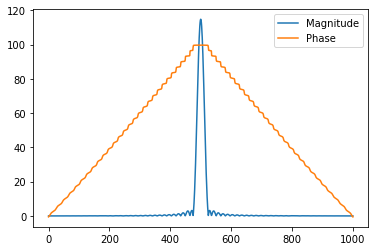

In [39]:
params, field_cut = next(iter(dataloader))

x = field_cut[:,:,0:2]

x_polar_complex = torch.view_as_complex(x)

print(x_polar_complex.shape)

print(x_polar_complex)

print(torch.abs(x_polar_complex))
print(torch.angle(x_polar_complex))
plt.figure()
plt.plot(torch.abs(x_polar_complex[0]),label = 'Magnitude')
plt.plot(np.unwrap(torch.angle(x_polar_complex[0]).detach().numpy()),label = 'Phase')
plt.legend()

In [55]:
dataset = AntennaDatasetLoaders.ReflectorCutDatasetComplex(cuts = 20)

params, field_cut = next(iter(dataloader))

plt.figure()
plt.plot(torch.abs(x_polar_complex[0]),label = 'Magnitude')
plt.plot(np.unwrap(torch.angle(x_polar_complex[0]).detach().numpy()),label = 'Phase')
plt.legend()

torch.Size([20, 1001, 4])
torch.Size([20, 1001, 1])
torch.Size([20, 1001, 1])
torch.Size([20, 1001, 2])


In [3]:
from ssapp.models.NeuralNetworkModels.FFT_Neural_Nets import LatentSpaceNet
import torch


model = LatentSpaceNet()
model(torch.randn(3))

tensor([-0.0991,  0.3056], grad_fn=<AddBackward0>)